# Chapter 08 排序
## 8.1 Numpy的快速排序
- `np.sort`
- `np.argsort`

In [1]:
import numpy as np

x = np.array([2, 1, 4, 3, 5])
np.sort(x)


array([1, 2, 3, 4, 5])

In [2]:
x.sort()
print(x)


[1 2 3 4 5]


In [3]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)


[1 0 3 2 4]


In [4]:
x[i]


array([1, 2, 3, 4, 5])

## 8.2 按行或列排序

In [5]:
rng = np.random.default_rng(seed=42)
X = rng.integers(0, 10, (4, 6))
print(X)


[[0 7 6 4 4 8]
 [0 6 2 0 5 9]
 [7 7 7 7 5 1]
 [8 4 5 3 1 9]]


In [6]:
np.sort(X, axis=0)


array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]])

In [7]:
np.sort(X, axis=1)


array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

## 8.3 部分排序
- `np.partition`

In [8]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)


array([2, 1, 3, 4, 6, 5, 7])

In [9]:
np.partition(X, 2, axis=1)


array([[0, 4, 4, 7, 6, 8],
       [0, 0, 2, 6, 5, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

## 8.4 Example: k-Nearest Neighbors

/tmp/ipykernel_210165/250601432.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


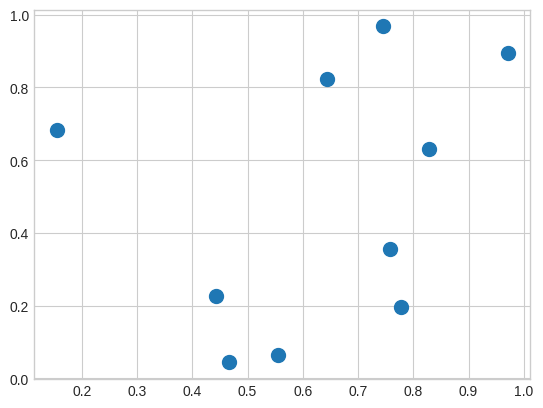

In [10]:
import matplotlib.pyplot as plt
X = rng.random((10, 2))
%matplotlib inline

plt.style.use('seaborn-whitegrid')
plt.scatter(X[:, 0], X[:, 1], s=100)


In [11]:
dist_sq = np.sum((X[:, np.newaxis]-X[np.newaxis, :])**2, axis=-1)


In [12]:
differences = X[:, np.newaxis] - X[np.newaxis, :]
differences.shape


(10, 10, 2)

In [13]:
sq_differences = differences ** 2
sq_differences.shape


(10, 10, 2)

In [14]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape


(10, 10)

In [15]:
dist_sq.diagonal()


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)


[[0 9 3 5 4 8 1 6 2 7]
 [1 7 2 6 4 8 3 0 9 5]
 [2 7 1 6 4 3 8 0 9 5]
 [3 0 4 5 9 6 1 2 8 7]
 [4 6 3 1 2 7 0 5 9 8]
 [5 9 3 0 4 6 8 1 2 7]
 [6 4 2 1 7 3 0 5 9 8]
 [7 2 1 6 4 3 8 0 9 5]
 [8 0 1 9 3 4 7 2 6 5]
 [9 0 5 3 4 8 6 1 2 7]]


In [17]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)


In [18]:
nearest_partition


array([[0, 9, 3, 5, 4, 1, 6, 7, 8, 2],
       [1, 7, 2, 6, 4, 8, 3, 0, 5, 9],
       [1, 7, 2, 6, 4, 8, 3, 0, 5, 9],
       [3, 0, 4, 5, 9, 6, 1, 7, 8, 2],
       [4, 6, 3, 1, 2, 7, 0, 5, 8, 9],
       [3, 9, 5, 0, 1, 2, 6, 7, 8, 4],
       [4, 6, 2, 1, 7, 3, 0, 5, 8, 9],
       [1, 7, 2, 6, 4, 8, 3, 0, 5, 9],
       [1, 0, 8, 9, 3, 5, 6, 7, 2, 4],
       [9, 0, 5, 3, 4, 1, 6, 7, 8, 2]])

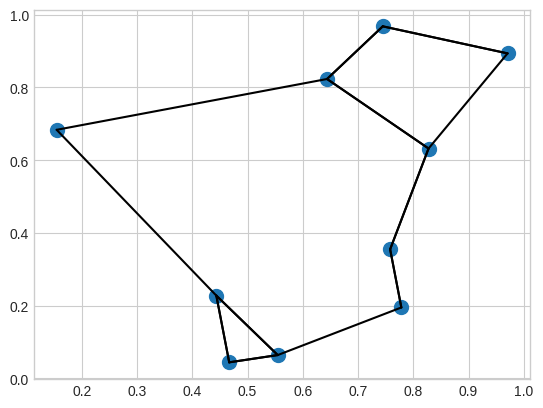

In [19]:
plt.scatter(X[:, 0], X[:, 1], s=100)
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')
